In [ ]:
# GPU 할당 확인
!nvidia-smi

Thu Jan  5 04:51:37 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   65C    P0    30W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# mount drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ln -s /content/drive/My\ Drive/ /mydrive

In [ ]:
!ls /mydrive

 Bert_finetuning_naver._sentimentipynb	 nli_finetuning
 Bert.ipynb				 NLP_day1.ipynb
 chatbot.ipynb				 NLP_day2.ipynb
 chatbot_think_big.ipynb		 NLP_day5.ipynb
 CNN_day5.ipynb				 NLP_day6.ipynb
 CNN_day6.ipynb				 NLP_day7.ipynb
 CNN_day7.ipynb				 NLP_final.ipynb
 CNN_slepp_wake.ipynb			 nlp.ipynb
'Colab Notebooks'			 NLP_Project
 electronic-priciple.pdf		 NLP_Project2.ipynb
 Eyes_detect.ipynb			 NLP_Project_kobert.ipynb
 eyes_project				 NLP_Project_skt_kobert.ipynb
 Eyes_project.ipynb			 package.ipynb
 final_project				 photo.jpg
 gan					'Project(C)_chatbot_BERT.ipynb의 사본'
 Google_teachable_machine_test.ipynb	'전자회로  Sedra Smith.pdf'
 Helmet_img				 think_big_chatbot_전처리.ipynb
 감정일기.ipynb				 Thinkbig_chatbot.ipynb
'My Drive'				 Untitled
 my_fund				 Untitled0.ipynb


In [ ]:
%cd /mydrive/final_project/yolov4_custom/yolov4

/content/drive/My Drive/final_project/yolov4_custom/yolov4


In [ ]:
!git clone https://github.com/AlexeyAB/darknet

In [ ]:
!pwd

/content/drive/My Drive/final_project/yolov4_custom/yolov4


In [ ]:
# 이미지 불러오기
from glob import glob
img_list = glob('/mydrive/final_project/yolov4_custom/yolov4/darknet/build/darknet/x64/data/obj/*jpg')
len(img_list)

21

In [ ]:
# 불러온 이미지를 학습과 검증에 사용할 train/test 데이터로 분리한 후, train.txt, test.txt 파일을 생성한다
from sklearn.model_selection import train_test_split
train_img_list, test_img_list = train_test_split(img_list, test_size=0.1, random_state=42) # random_state는 임의로 선택
print(len(train_img_list), len(test_img_list))

18 3


In [ ]:
# 위에서 생성한 train.txt 파일을 저장한다(경로 설정 주의)
with open('darknet/build/darknet/x64/data/train.txt', 'w') as f:
    f.write('\n'.join(train_img_list) + '\n')

In [ ]:
# 위에서 생성한 test.txt 파일을 저장한다
with open('darknet/build/darknet/x64/data/test.txt', 'w') as f:
    f.write('\n'.join(test_img_list) + '\n')
# train/test.txt 파일 내용 예시
# darknet/build/darknet/x64/data/obj/img1.jpg

In [ ]:
# 학습 전 make 파일을 생성한다.
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile
!make

/content/drive/MyDrive/final_project/yolov4_custom/yolov4/darknet
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -DCUDNN_HALF -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -DCUDNN_HALF -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:946:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1147:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
     

In [ ]:
# make 파일 저장 -> 학습전에 해야 하는 듯 -> 다음 학습할때 확인
# %cp ./darknet /content/drive/MyDrive/final_project/yolov4_custom/yolov4/darknet/bin/darknet

In [ ]:
# 학습 진행 -> 절대경로로 하는게 좋음
# !./darknet detector train {obj.data 경로} {yolov4-obj.cfg 경로} {yolov4.conv.137 경로} -dont_show
!./darknet detector train {'/mydrive/final_project/yolov4_custom/yolov4/darknet/build/darknet/x64/data/obj.data'} {'/mydrive/final_project/yolov4_custom/yolov4/darknet/build/darknet/x64/cfg/yolov4-obj.cfg'} {'/mydrive/final_project/yolov4_custom/yolov4/darknet/build/darknet/x64/yolov4.conv.137'} -dont_show

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
 total_bbox = 109909, rewritten_bbox = 0.000000 % 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 139 Avg (IOU: 0.000000), count: 1, class_loss = 0.000001, iou_loss = 0.000000, total_loss = 0.000001 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 150 Avg (IOU: 0.000000), count: 1, class_loss = 0.000041, iou_loss = 0.000000, total_loss = 0.000041 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 161 Avg (IOU: 0.735420), count: 3, class_loss = 0.286140, iou_loss = 0.528716, total_loss = 0.814857 
 total_bbox = 109912, rewritten_bbox = 0.000000 % 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 139 Avg (IOU: 0.469820), count: 3, class_loss = 4.985406, iou_loss = 29.399366, total_loss = 34.384773 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 150 Avg (IOU: 0.578230), count: 3, class_loss = 5.087468, iou_loss = 6.896085, total_loss = 11.983553 
v3 (iou loss, 

In [ ]:
# /mydrive/final_project/yolov4_custom/yolov4/darknet/build/darknet/x64/data/obj.data

# /mydrive/final_project/yolov4_custom/yolov4/darknet/build/darknet/x64/cfg/yolov4-obj.cfg

# /mydrive/final_project/yolov4_custom/yolov4/darknet/build/darknet/x64/yolov4.conv.137

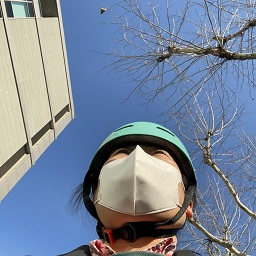

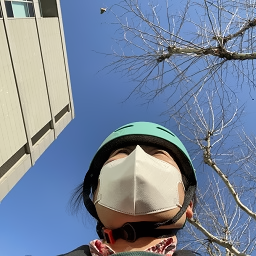

In [ ]:
# # opencv test용
# from google.colab.patches import cv2_imshow
# import sys
# import numpy as np
# import cv2

# src = cv2.imread('/content/drive/MyDrive/final_project/yolov4_custom/yolov4/darknet/build/darknet/x64/data/obj/IMG_7025.jpg')

# if src is None:
#     print('Image load failed!')
#     sys.exit()

# dst = cv2.bilateralFilter(src, -1, 10, 5)

# cv2_imshow(src)
# cv2_imshow(dst)
# cv2.waitKey()

# cv2.destroyAllWindows()

In [ ]:
#########test
# mount drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# !git clone https://github.com/rokibulislaam/colab-ffmpeg-cuda.git

Cloning into 'colab-ffmpeg-cuda'...
remote: Enumerating objects: 62, done.
remote: Total 62 (delta 0), reused 0 (delta 0), pack-reused 62
Unpacking objects: 100% (62/62), done.
Checking out files: 100% (32/32), done.


In [ ]:
# !cp -r ./colab-ffmpeg-cuda/bin/. /usr/bin/

In [ ]:
!ln -s /content/drive/My\ Drive/ /mydrive
!ls /mydrive

 Bert_finetuning_naver._sentimentipynb	 nli_finetuning
 Bert.ipynb				 NLP_day1.ipynb
 chatbot.ipynb				 NLP_day2.ipynb
 chatbot_think_big.ipynb		 NLP_day5.ipynb
 CNN_day5.ipynb				 NLP_day6.ipynb
 CNN_day6.ipynb				 NLP_day7.ipynb
 CNN_day7.ipynb				 NLP_final.ipynb
 CNN_slepp_wake.ipynb			 nlp.ipynb
'Colab Notebooks'			 NLP_Project
 electronic-priciple.pdf		 NLP_Project2.ipynb
 Eyes_detect.ipynb			 NLP_Project_kobert.ipynb
 eyes_project				 NLP_Project_skt_kobert.ipynb
 Eyes_project.ipynb			 package.ipynb
 final_project				 photo.jpg
 gan					'Project(C)_chatbot_BERT.ipynb의 사본'
 Google_teachable_machine_test.ipynb	'전자회로  Sedra Smith.pdf'
 Helmet_img				 think_big_chatbot_전처리.ipynb
 감정일기.ipynb				 Thinkbig_chatbot.ipynb
'My Drive'				 Untitled
 my_fund				 Untitled0.ipynb


In [ ]:
%cd /mydrive/final_project/yolov4_custom/yolov4

/content/drive/My Drive/final_project/yolov4_custom/yolov4


In [ ]:
# 학습 후 make 파일을 생성한다.
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile
!make

/content/drive/My Drive/final_project/yolov4_custom/yolov4/darknet
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -DCUDNN_HALF -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -DCUDNN_HALF -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:946:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1147:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
    

In [ ]:
# darknet opencv imshow
# https://mldlcvmjw.tistory.com/316
#download files
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  #plt.rcParams['figure.figsize'] = [10, 5]
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()
  
  
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)
def download(path):
  from google.colab import files
  files.download(path)

In [ ]:
# 가중치 파일 가져오기
!cp -r '/content/drive/MyDrive/final_project/yolov4_custom/yolov4/darknet/build/darknet/x64/backup/yolov4-obj_1000.weights' ./weights

 CUDA-version: 11020 (11020), cuDNN: 8.1.1, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   3 route  1 		                           ->  208 x 208 x  64 
   4 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   5 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   6 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   8 conv  

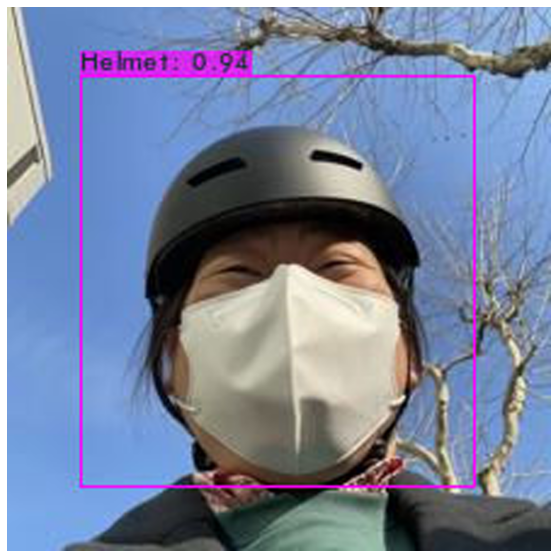

In [ ]:
# import ffmpeg
!./darknet detector test {'/mydrive/final_project/yolov4_custom/yolov4/darknet/build/darknet/x64/data/obj.data'} {'/mydrive/final_project/yolov4_custom/yolov4/darknet/build/darknet/x64/cfg/yolov4-obj.cfg'} {'/content/drive/MyDrive/final_project/yolov4_custom/yolov4/darknet/build/darknet/x64/backup/yolov4-obj_1000.weights'} {'/content/drive/MyDrive/final_project/yolov4_custom/yolov4/test_img/IMG_7163.jpg'} -dont_show
imShow('predictions.jpg')